In [2]:
import calour as ca
import calour_utils as cu
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

failed to load logging config file


In [3]:
ca.set_log_level(11)

In [4]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/moving-pictures'

In [5]:
db=ca.database._get_database_class('dbbact')

creating logger


In [6]:
%matplotlib inline

# Load the dataset:
## Moving pictures of the human microbiome
Caporaso, J.G., Lauber, C.L., Costello, E.K., Berg-Lyons, D., Gonzalez, A., Stombaugh, J., Knights, D., Gajer, P., Ravel, J., Fierer, N., Gordon, J.I., Knight R.

Genome biology. 2011 May;12(5):1-8

https://doi.org/10.1186/gb-2011-12-5-r50

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2022-07-11 19:30:52 INFO loaded 1967 samples, 7948 features
2022-07-11 19:30:52 WARNING These have metadata but do not have data - dropped (2): {'550.L6S57.s.6.sequence', '550.L3S184.s.3.sequence'}
2022-07-11 19:30:53 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-11 19:30:53 INFO After filtering, 967 remain.


In [8]:
datc=dat.cluster_features(10)

2022-07-11 19:30:53 INFO After filtering, 3660 remain.


In [9]:
datc=datc.sort_samples('days_since_experiment_start').sort_samples('host')

# Separate to the different body sites
and keep only relevant bacteria

In [10]:
skin=datc.filter_samples('sample_type','skin')
skin=skin.cluster_features(10)

2022-07-11 19:31:00 INFO After filtering, 2910 remain.


In [11]:
feces=datc.filter_samples('sample_type','stool')
feces=feces.cluster_features(10)

2022-07-11 19:31:01 INFO After filtering, 868 remain.


In [12]:
saliva=datc.filter_samples('sample_type','saliva')
saliva=saliva.cluster_features(10)

2022-07-11 19:31:01 INFO After filtering, 239 remain.


# Plot a term-based PCoA for all the samples

2022-07-10 10:07:47 INFO Calculating per-ASV term scores
2022-07-10 10:07:47 WARNING No experiment found matching the details [['DataMD5', 'd1bf5f69495c04307a3895571ebf254f'], ['MapMD5', '1f951f42a7ae4249951ecedb4cb5c4c5']]
2022-07-10 10:07:47 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2022-07-10 10:08:03 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-10 10:08:03 INFO After filtering, 4728 remain.
2022-07-10 10:08:05 INFO plotting


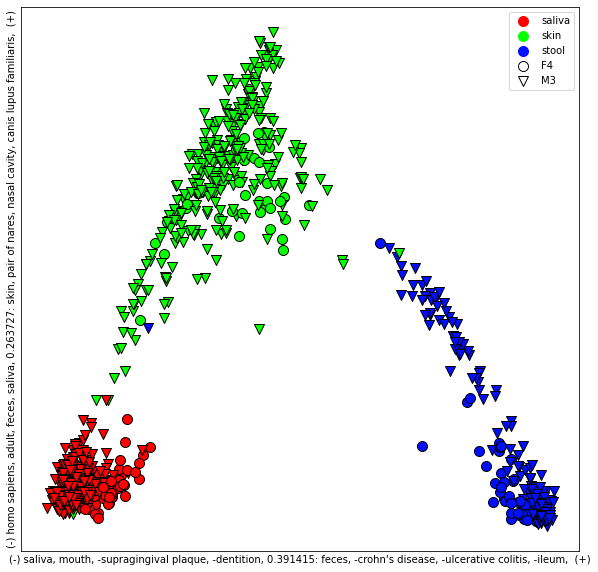

In [13]:
res = db.plot_term_pcoa(datc,'sample_type',freq_weight='linear',show_field='sample_type', marker_field='host', size_scale=10)

In [14]:
res[0].savefig('./fig-pcoa-all.pdf')

## dbBact term PCA for all body sites of participant M3

2022-07-10 10:08:16 INFO Calculating per-ASV term scores
2022-07-10 10:08:17 WARNING No experiment found matching the details [['DataMD5', 'd1bf5f69495c04307a3895571ebf254f'], ['MapMD5', '1f951f42a7ae4249951ecedb4cb5c4c5']]
2022-07-10 10:08:17 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2022-07-10 10:08:32 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-10 10:08:32 INFO After filtering, 4724 remain.
2022-07-10 10:08:34 INFO plotting


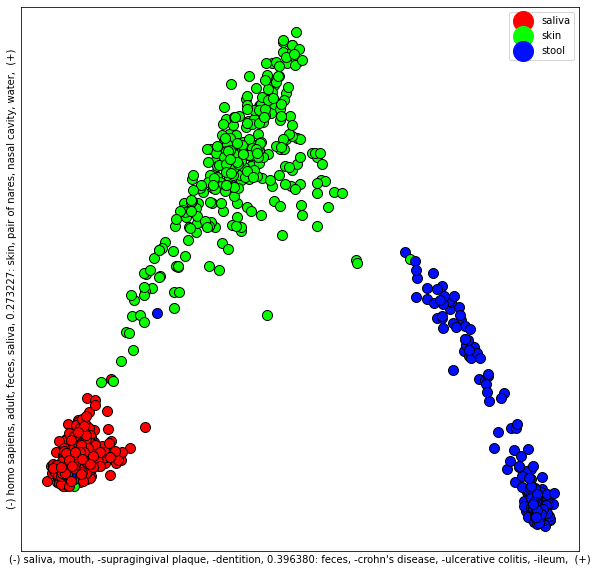

In [15]:
res = db.plot_term_pcoa(datc.filter_samples('host','M3'),'sample_type',freq_weight='linear',size_scale=20)

In [16]:
res[0].savefig('./fig-pcoa-M3-all.pdf')

## dbBact term PCA for all body sites of participant F4

2022-07-10 10:08:54 INFO Calculating per-ASV term scores
2022-07-10 10:08:54 WARNING No experiment found matching the details [['DataMD5', 'd1bf5f69495c04307a3895571ebf254f'], ['MapMD5', '1f951f42a7ae4249951ecedb4cb5c4c5']]
2022-07-10 10:08:54 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2022-07-10 10:08:58 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-10 10:08:58 INFO After filtering, 4529 remain.
2022-07-10 10:09:00 INFO plotting


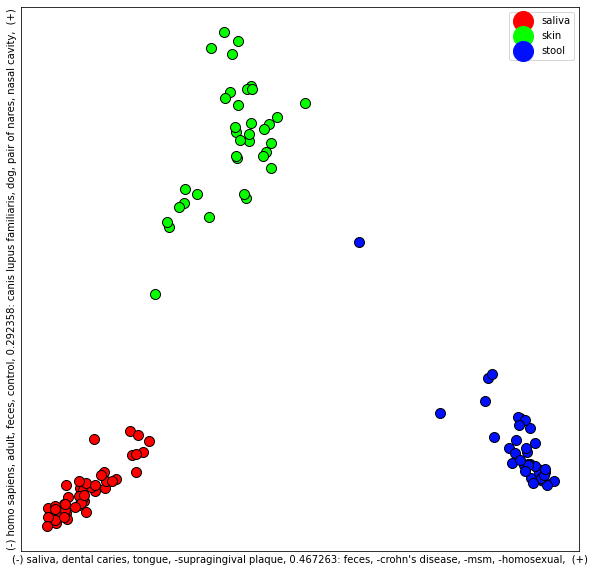

In [17]:
res = db.plot_term_pcoa(datc.filter_samples('host','F4'),'sample_type',freq_weight='linear',size_scale=20)

In [18]:
res[0].savefig('./fig-pcoa-F4-all.pdf')

# Per sample type word clouds

2022-07-10 10:09:04 INFO After filtering, 191 remain.
2022-07-10 10:09:04 INFO Getting dbBact annotations for 191 sequences, please wait...
2022-07-10 10:09:09 INFO got 4369 annotations
2022-07-10 10:09:09 INFO Got 22281 annotation-sequence pairs
2022-07-10 10:09:09 INFO Added annotation data to experiment. Total 4369 annotations, 191 ASVs


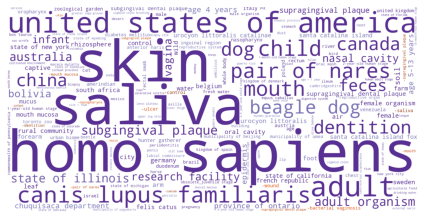

In [19]:
f=db.draw_wordcloud(skin.filter_prevalence(0.2))

2022-07-10 10:09:16 INFO After filtering, 57 remain.
2022-07-10 10:09:16 INFO Getting dbBact annotations for 57 sequences, please wait...
2022-07-10 10:09:18 INFO got 1566 annotations
2022-07-10 10:09:18 INFO Got 8929 annotation-sequence pairs
2022-07-10 10:09:18 INFO Added annotation data to experiment. Total 1566 annotations, 57 ASVs


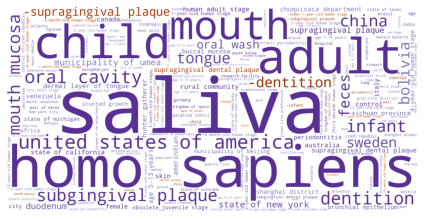

In [20]:
f=db.draw_wordcloud(saliva.filter_prevalence(0.2))

2022-07-10 10:09:24 INFO After filtering, 142 remain.
2022-07-10 10:09:25 INFO Getting dbBact annotations for 142 sequences, please wait...
2022-07-10 10:09:29 INFO got 2943 annotations
2022-07-10 10:09:29 INFO Got 24718 annotation-sequence pairs
2022-07-10 10:09:29 INFO Added annotation data to experiment. Total 2943 annotations, 142 ASVs


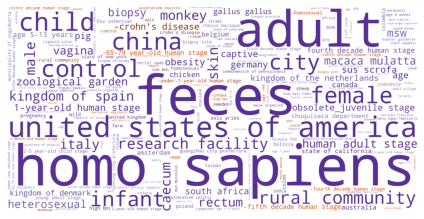

In [21]:
f=db.draw_wordcloud(feces.filter_prevalence(0.2))

# Now let's look at the feces samples
## we see a cluster of bacteria appearing together in part of the samples of M3
they seem skin related (by clicking on the interactive heatmap and seeing the dbBact annotations)

In [22]:
f=feces.plot(sample_field='host',gui='qt5')

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


2022-07-10 10:09:42 WARNING You need to set up jupyter notebook with `%matplotlib notebook`


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

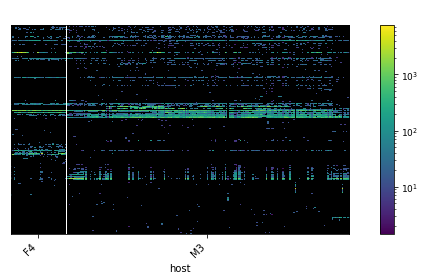

In [23]:
f=feces.plot(sample_field='host',gui='jupyter')

In [24]:
f.save_figure('./fig-heatmap-feces.pdf')

In [15]:
fecm3=feces.filter_samples('host','M3')
fecm3=fecm3.cluster_features(10)

2022-07-11 19:31:41 INFO After filtering, 737 remain.


## Let's look at the heatmap sorted by dbbact terms
we select the best matching term for each feature (based on the f-score) from the following options:

feces, skin, saliva, vagina, soil, water

In [13]:
fecm3=fecm3.add_terms_to_features('dbbact',use_term_list=['feces','saliva','skin','vagina','water'],field_name='common_term')

2022-06-25 18:31:35 INFO Getting dbBact annotations for 737 sequences, please wait...
2022-06-25 18:31:59 INFO got 4634 annotations
2022-06-25 18:31:59 INFO Got 68301 annotation-sequence pairs
2022-06-25 18:31:59 INFO Added annotation data to experiment. Total 4634 annotations, 737 ASVs


In [14]:
fecm3=fecm3.sort_by_metadata('common_term',axis='f')

In [111]:
f=fecm3.plot(sample_field='host',bary_fields=['common_term'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


In [59]:
f.save_figure('./fig-heatmap-feces-terms.pdf')

In [16]:
cu.splot(fecm3,'host',bary_fields=['common_term'])

# Color PCA and heatmap by PCA location (suspected contaminants)

## we need a variant of the plot_term_pcoa

In [16]:
    def plot_term_pcoa(exp, field=None, pc1=0, pc2=1, term_type='term', freq_weight='linear', normalize_terms=False, ignore_exp=True, max_id=None, n_components=10, show_field='_sample_id', size_field=None, size_scale=10, marker_field=None, marker_order=['o', 'v', 's', '*', 'p', 'D', '+', 'x', '.', 'X'], edgecolors='black', cmap=None, permute_samples=True, **kwargs):
        '''
        Parameters
        ----------
        exp : calour.Experiment
            The experiment to compare the features to
        field: str or None, optional
            the files to color the samples by (can be numeric or categorical)
        term_type : str or None (optional)
            The type of annotation data to test for enrichment
            options are:
            'term' - ontology terms associated with each feature.
            'parentterm' - ontology terms including parent terms associated with each feature.
            'annotation' - the full annotation strings associated with each feature
            'combined' - combine 'term' and 'annotation'
            'fscore' - the fscore for each term (recall/precision)
        freq_weight : str (optional)
            How to incorporate the frequency of each feature (in a sample) into the term count for the sample. options:
                'linear' : use the frequency
                'log' : use the log2 of the frequency
                'binary' : use the presence/absence of the feature
                'rank' : use the rank of each feature across the same feature on all samples
                'rank2' : use the rank of each feature within each sample (independent on other samples)
        normalize_terms: bool, optional
            if True, normalize each term score (not recommended)
        ignore_exp: list of int or None or True, optional
            List of experiments to ignore in the analysis
            True to ignore annotations from the current experiment
            None (default) to use annotations from all experiments including the current one
        max_id: int or None, optional
            the maximal dbBact annotation id to use for the terms
        n_components: int, optional
            the number of PCA dimensions to calculate
        show_field: str or None, optional
            if str, name of the field value to show on mouse hover (works only with %matploblib widget enabled)
            None - disable the mouse hover
        size_field: str or None, optional
            the field to use for the sample sizes (must be numeric)
        size_scale: float, optional
            the scaling to apply to each sample marker size
        marker_field: str or None, optional
            the field to use for the marker shapes. marker shapes are taken from marker_order parameter
        marker_order: list of str, optional
            the marker shapes for the different marker_field values. see matplotlib marker shapes
        edgecolors: str or None, optional
            the marker edge color. None to not plot marker edges
        cmap: str or None, optional
            if None, automaticallly choose the colormap based on the numeric/categorical nature of the field parameter
        permute_samples: bool, optional
            if True, randomly permute the sample plotting order (to remove order-dependent artifacts)
        **kwargs:
            passed to dbbact-calour.dbbact.sample_term_scores(), Include:
                use_precision: bool, optional (default is True)
                    if True, return precision values (i.e. fraction of annotations for each feature contatining each term) as the scores (float range 0-1)
                    if False, return total number of annotations containing the term for each feature (positive integer)
                in_term_score : int (optional)
                    The minimal score of a term in a feature in order to include in output (otherwise it is set to 0).
                    Prior to the matrix multiplication, on the feature X term matrix, for each feature and term, the corresponding value in the matrix is set to 0 if score<min_term_score
                    This is used prior to per-term normalization in order to reduce the effect of spurious terms (appearing in a small number of annotations for a given feature)
                Use_term_pairs: bool, optional
                    True to get all term pair annotations (i.e. human+feces etc.)

        Returns
        -------
        fig: matplotlib.figure
            the figure containing the pcoa
        coords:
        pca:
        term_exp: calour.Experiment
            containing the original experiment samples as samples, features are dbbact terms, and the sample/term data is the term score for the sample
        axis_coords:

        '''
        from sklearn.decomposition import PCA

        print('Calculating per-ASV term scores')
        db = ca.database._get_database_class('dbbact')
        term_exp = db.sample_term_scores(exp, term_type=term_type, ignore_exp=ignore_exp, freq_weight=freq_weight, max_id=max_id, **kwargs)
        # get rid of features not present in any sample (if we used min_term_score)
        term_exp = term_exp.filter_sum_abundance(0, strict=True)

        if normalize_terms:
            term_exp = term_exp.normalize(1, axis='f')

        term_exp.data = np.sqrt(term_exp.data)
        term_exp.sparse = False
        # term_exp.data = scipy.stats.rankdata(term_exp.data, axis=0)

        pca = PCA(n_components=n_components)
        coords = pca.fit_transform(term_exp.get_data(sparse=False))

        exp = exp.copy()
        exp.sample_metadata['_calour_pc1'] = coords[:, pc1]
        exp.sample_metadata['_calour_pc2'] = coords[:, pc2]

        print('plotting')
        fig = plt.figure(figsize=[10, 10])
        ax = plt.gca()

        # set up the per-sample sizes in _calour_pcoa_sizes
        vals = []
        if size_field is None:
            sizes = size_scale ** 2
        else:
            sizes = (size_scale * exp.sample_metadata[size_field]) ** 2
        exp.sample_metadata['_calour_pcoa_sizes'] = sizes

        legend_h = []

        # set up the per-sample colors in _calour_pcoa_colors and the colormap
        if field is None:
            plot_colors = 'b'
            if cmap is None:
                cmap = 'hsv'
        else:
            # if it is numeric, select appropriate colormap and normalizer
            field_vals = exp.sample_metadata[field]
            if pd.to_numeric(field_vals, errors='coerce').notnull().all():
                plot_colors = field_vals.values
                norm = mpl.colors.Normalize(vmin=np.min(field_vals), vmax=np.max(field_vals))
                if cmap is None:
                    cmap = 'PuBu_r'
            else:
                # not numeric - so discrete values
                if cmap is None:
                    cmap = 'hsv'
                vals = field_vals.unique()
                norm = mpl.colors.Normalize(vmin=0, vmax=len(vals))
                plot_colors = exp.sample_metadata[field].astype('category').cat.codes
                ccmap = mpl.cm.get_cmap(cmap)
                for idx, clab in enumerate(exp.sample_metadata[field].astype('category').cat.categories):
                        ch = mpl.lines.Line2D([], [], color=ccmap(norm(idx)), marker='o', linestyle='None', markersize=size_scale, label=clab)
                        legend_h.append(ch)
        exp.sample_metadata['_calour_pcoa_colors'] = plot_colors

        # set the colors according to pc1 coordinate above/below mean
        exp.sample_metadata['_calour_pcoa_colors'] = 'b'
        exp.sample_metadata.loc[exp.sample_metadata['_calour_pc1']>np.mean(exp.sample_metadata['_calour_pc1']),'_calour_pcoa_colors']='magenta'

        # set up the per-sample markers in _calour_pcoa_markers
        if marker_field is None:
            markers = '.'
        else:
            marker_ids = exp.sample_metadata[marker_field].astype('category').cat.codes
            markers = [marker_order[x % len(marker_order)] for x in marker_ids]
            for idx, clab in enumerate(exp.sample_metadata[marker_field].astype('category').cat.categories):
                    ch = mpl.lines.Line2D([], [], color='white', marker=marker_order[idx % len(marker_order)], linestyle='None', markersize=size_scale, label=clab, markeredgecolor='black')
                    legend_h.append(ch)
        exp.sample_metadata['_calour_pcoa_markers'] = markers

        # randomly permute the samples so we don't get artifact by sample order in dense data where last ones are observed more since on top
        if permute_samples:
            exp = exp.reorder(np.random.permutation(np.arange(len(exp.sample_metadata))), axis='s')

        # the scatter plot (we iterate to keep the random order)
        paths = []
        for csamp_id, crow in exp.sample_metadata.iterrows():
            sc = plt.scatter(crow['_calour_pc1'], crow['_calour_pc2'], c=crow['_calour_pcoa_colors'], marker=crow['_calour_pcoa_markers'], s=crow['_calour_pcoa_sizes'], norm=norm, cmap=cmap, edgecolors=edgecolors)
            paths.append(sc.get_paths())

        # create the legend
        # colors

        codes = dict(enumerate(exp.sample_metadata[field].astype('category').cat.categories))
        plt.legend(handles=sc.legend_elements()[0], labels=[codes[x] for x in range(len(codes))])

        # set the axis titles
        axis_coords = []
        for caxis in range(n_components):
            sorted_pos_rev = np.argsort(pca.components_[caxis])[::-1]
            sorted_pos = np.argsort(pca.components_[caxis])
            top_terms = [term_exp.feature_metadata.iloc[aaa]['term'] for aaa in sorted_pos_rev[:4]]
            low_terms = [term_exp.feature_metadata.iloc[aaa]['term'] for aaa in sorted_pos[:4]]
            label = '(-) '
            for idx2, ctop_term in enumerate(low_terms):
                if pca.components_[caxis][sorted_pos[idx2]] > 0:
                    continue
                label += '%s, ' % ctop_term
            label += '%f: ' % pca.explained_variance_ratio_[caxis]
            for idx2, ctop_term in enumerate(top_terms):
                if pca.components_[caxis][sorted_pos_rev[idx2]] < 0:
                    continue
                label += '%s, ' % ctop_term
            label += ' (+)'
            axis_coords.append(label)

        plt.xlabel(axis_coords[pc1])
        plt.ylabel(axis_coords[pc2])

        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])

        plt.legend(handles=legend_h)

        sc = mpl.collections.PathCollection(paths)

        return fig, coords, pca, term_exp, axis_coords, exp

Calculating per-ASV term scores
2022-07-11 19:45:48 WARNING No experiment found matching the details [['DataMD5', 'd1bf5f69495c04307a3895571ebf254f'], ['MapMD5', '1f951f42a7ae4249951ecedb4cb5c4c5']]
2022-07-11 19:45:48 WARNING No matching experiment found in dbBact. Not ignoring any experiments
2022-07-11 19:45:49 WARNING Do you forget to normalize your data? It is required before running this function
2022-07-11 19:45:49 INFO After filtering, 3998 remain.
plotting
2022-07-11 19:45:51 WARNING No handles with labels found to put in legend.


/Users/amnon/miniconda3/envs/calour/lib/python3.9/site-packages/matplotlib/collections.py:1120: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


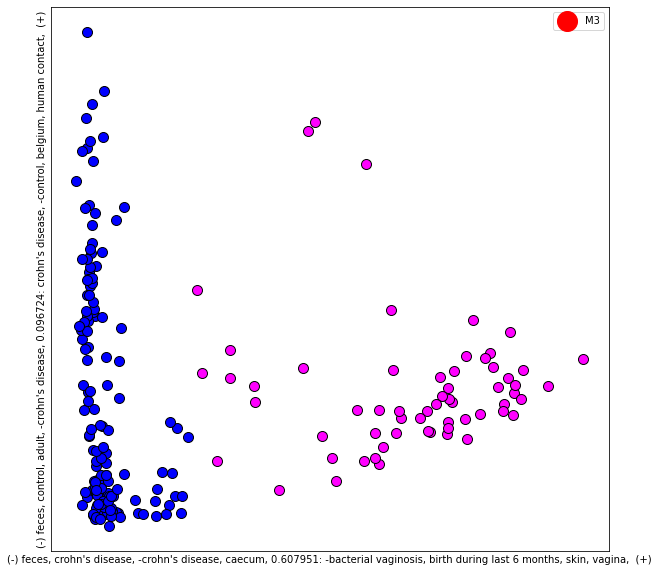

In [54]:
res=plot_term_pcoa(fecm3,'host',freq_weight='linear',size_scale=20)

In [55]:
res[0].savefig('./fig-pca-feces-m3-coord.pdf')

In [56]:
cexp=res[5]

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


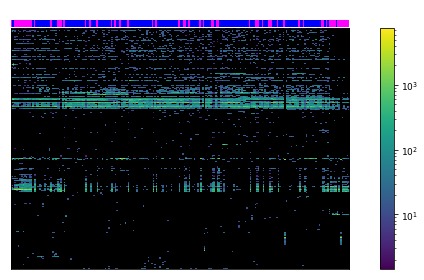

In [57]:
f=cexp.sort_samples('days_since_experiment_start').plot(gui='cli',barx_fields=['_calour_pcoa_colors'],barx_label=False,barx_colors={'magenta':'magenta','b':'b'})

In [58]:
f.save_figure('./fig-heatmap-feces-m3-coord.pdf',dpi=600)

In [59]:
cexp=cexp.add_terms_to_features('dbbact',['feces','skin'])

In [60]:
cexp.feature_metadata['cc']=cexp.feature_metadata['common_term'].copy()
cexp.feature_metadata.loc[cexp.feature_metadata['cc']=='skin','cc']='skin'
cexp.feature_metadata.loc[cexp.feature_metadata['cc']=='other','cc']='zz'
cexp.feature_metadata.loc[cexp.feature_metadata['cc']=='na','cc']='zz'


In [61]:
tt=cexp.sort_abundance()
tt=tt.sort_by_metadata('cc',axis='f')

/Users/amnon/git/calour/calour/heatmap/heatmap.py:308: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(bad_color)


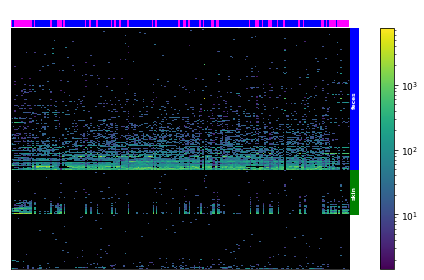

In [62]:
f=tt.sort_samples('days_since_experiment_start').plot(gui='cli',barx_fields=['_calour_pcoa_colors'],barx_label=False,barx_colors={'magenta':'magenta','b':'b'},bary_fields=['cc'],bary_colors={'feces':'blue','skin':'green','':'white','zz':'white'},bary_label_kwargs={'color':'white'})

In [63]:
f.save_figure('./fig-heatmap-feces-m3-coord-with-term.pdf',dpi=600)